# Python Statistics Essential Training

## Collecting and Cleaning Data

### 01_01 - Loading data

Using the Ames, Iowa Housing Data https://jse.amstat.org/v19n3/decock.pdf


Goals:

1. Load data from a CSV file using the `pd.read_csv` function.
2. Understand how to access and interpret the shape of a DataFrame.
3. Apply the `.describe` method to obtain summary statistics for a DataFrame.

In [1]:
# 01_06
import numpy as np
import pandas as pd

def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )

url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
url = 'data/ames-housing-dataset.zip'
raw_df = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

housing = clean_housing(raw_df)
display(housing)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,...,0,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,...,0,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77,10010,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2006,WD,Normal,170000


In [4]:
import numpy as np
import pandas as pd
pd.__version__

'2.2.2'

In [5]:
# import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
url = 'data/ames-housing-dataset.zip'
df = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')


In [19]:
df.shape

(2930, 82)

In [20]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900


In [21]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,...,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,...,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,...,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,...,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


### 01_02 - Strings and Categories


Goals:

* Understand the data types of columns in a DataFrame using the `.dtypes` attribute.
* Select and filter categorical columns using the `.select_dtypes` method.
* Compute and interpret summary statistics for categorical columns using the `.describe` method.
* Determine the memory usage of string columns in a DataFrame.
* Convert string columns to the `'category'` data type to save memory.


In [22]:
df.dtypes

Order              int64[pyarrow]
PID                int64[pyarrow]
MS SubClass        int64[pyarrow]
MS Zoning         string[pyarrow]
Lot Frontage       int64[pyarrow]
                       ...       
Mo Sold            int64[pyarrow]
Yr Sold            int64[pyarrow]
Sale Type         string[pyarrow]
Sale Condition    string[pyarrow]
SalePrice          int64[pyarrow]
Length: 82, dtype: object

In [23]:
# Categoricals - Pandas 1.x
df.select_dtypes(object)

""
0
1
2
3
4
...
2925
2926
2927
2928


In [24]:
# Categoricals - Pandas 2
df.select_dtypes('string')  # or 'strings[pyarrow]'

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,<NA>,<NA>,<NA>,WD,Normal
1,RH,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,<NA>,MnPrv,<NA>,WD,Normal
2,RL,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,<NA>,<NA>,Gar2,WD,Normal
3,RL,Pave,<NA>,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,<NA>,<NA>,<NA>,WD,Normal
4,RL,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,<NA>,MnPrv,<NA>,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,<NA>,GdPrv,<NA>,WD,Normal
2926,RL,Pave,<NA>,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,<NA>,MnPrv,<NA>,WD,Normal
2927,RL,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,<NA>,<NA>,<NA>,<NA>,Y,<NA>,MnPrv,Shed,WD,Normal
2928,RL,Pave,<NA>,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,<NA>,<NA>,<NA>,WD,Normal


In [25]:
# Categoricals
df.select_dtypes('string').describe().T

,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


In [26]:
(df
 .select_dtypes('string')
 .memory_usage(deep=True)
 .sum()
)

929599

In [27]:
(df
 .select_dtypes('string')
 .astype('category')
 .memory_usage(deep=True)
 .sum()
)

137945

In [25]:
929599 / 137945

6.738910435318424

In [28]:
df.shape

(2930, 82)

In [31]:
# Missing numeric columns (and strings in Pandas 1)
(df
 .isna()
 .mean() 
 .mul(100) # to get percentage
 .pipe(lambda ser: ser[ser > 0])
)

Lot Frontage      16.723549
Alley             93.242321
Mas Vnr Type      60.580205
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Bsmt Exposure      2.832765
BsmtFin Type 1     2.730375
BsmtFin SF 1       0.034130
BsmtFin Type 2     2.764505
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Electrical         0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Fireplace Qu      48.532423
Garage Type        5.358362
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Cars        0.034130
Garage Area        0.034130
Garage Qual        5.426621
Garage Cond        5.426621
Pool QC           99.556314
Fence             80.477816
Misc Feature      96.382253
dtype: float64

In [34]:
# Missing string values
(df
 .select_dtypes('string')
 .eq('')
 .mean() 
 .mul(100)
 .pipe(lambda ser: ser[ser > 0])
)

Series([], dtype: double[pyarrow])

In [35]:
(df
 .select_dtypes('string')
 .eq('')
 .any(axis='columns')
)


0       False
1       False
2       False
3       False
4       False
        ...  
2925    False
2926    False
2927    False
2928    False
2929    False
Length: 2930, dtype: bool[pyarrow]

In [46]:
# deleting
# Notice Alley is NA!
(df
 [~df.select_dtypes('string').eq('').any(axis='columns')]
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,...,0,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,...,0,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77,10010,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2006,WD,Normal,170000


In [50]:
# Looks like many values are NA
# Missing string values (Encoded as NA)
(df
 .select_dtypes('string')
 .eq('')
 .mean() 
 .mul(100)
#  .pipe(lambda ser: ser[ser > 0])
)


MS Zoning         0.0
Street            0.0
Alley             0.0
Lot Shape         0.0
Land Contour      0.0
Utilities         0.0
Lot Config        0.0
Land Slope        0.0
Neighborhood      0.0
Condition 1       0.0
Condition 2       0.0
Bldg Type         0.0
House Style       0.0
Roof Style        0.0
Roof Matl         0.0
Exterior 1st      0.0
Exterior 2nd      0.0
Mas Vnr Type      0.0
Exter Qual        0.0
Exter Cond        0.0
Foundation        0.0
Bsmt Qual         0.0
Bsmt Cond         0.0
Bsmt Exposure     0.0
BsmtFin Type 1    0.0
BsmtFin Type 2    0.0
Heating           0.0
Heating QC        0.0
Central Air       0.0
Electrical        0.0
Kitchen Qual      0.0
Functional        0.0
Fireplace Qu      0.0
Garage Type       0.0
Garage Finish     0.0
Garage Qual       0.0
Garage Cond       0.0
Paved Drive       0.0
Pool QC           0.0
Fence             0.0
Misc Feature      0.0
Sale Type         0.0
Sale Condition    0.0
dtype: double[pyarrow]

In [51]:
(df
 .query('`Pool QC`.isna()')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,...,0,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,...,0,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77,10010,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2006,WD,Normal,170000


In [52]:
(df
 .query('`Pool QC` == "NA"')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [56]:
# Fill in empty string with 'Not Applicable'
(df
 .assign(
     **df.select_dtypes('string').replace('', 'Not Applicable'))
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,...,0,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,...,0,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77,10010,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2006,WD,Normal,170000


In [57]:
# Examining unique values
# Note the empty string
(df
 .Electrical
 .value_counts()
)

Electrical
SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64[pyarrow]

In [58]:
(df
 .query('Electrical == ""')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [59]:
# This one was encoded as NA
(df
 ['Fireplace Qu']
 .value_counts()
)

Fireplace Qu
Gd    744
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64[pyarrow]

In [60]:
(df
 ['Bsmt Cond']
 .value_counts()
)

Bsmt Cond
TA    2616
Gd     122
Fa     104
Po       5
Ex       3
Name: count, dtype: int64[pyarrow]

In [61]:
# Converting to Category
(df
 .assign(
     **df
     .select_dtypes('string')
     .replace('', 'Not Applicable')
     .astype('category')
 )
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,...,0,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,...,0,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77,10010,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2006,WD,Normal,170000


In [65]:
# Converting to Category
(df
 .assign(
     **df
     .select_dtypes('string')
     .replace('', 'Not Applicable')
     .astype('category')
 )
 .memory_usage(deep=True)
 .sum()
)

1056142

In [67]:
# Converting to Category
(df
 .assign(
     **df
     .select_dtypes('string')
     .replace('', 'Not Applicable')
     #.astype('category')
 )
 .memory_usage(deep=True)
 .sum()
)

1847796

### 01_03 - Cleaning Numbers

Goals:

* Select and filter numeric columns using the `.select_dtypes` method.
* Compute and interpret summary statistics for numeric columns using the `.describe` method.
* Identify missing values in numeric columns.
* Display a larger amount of data using options for minimum rows and maximum columns.
* Utilize the `style` attribute to enhance the display of DataFrames.

In [68]:
# In Pandas 1.x there would be many numbers here
(df
 .select_dtypes(float)
)

""
0
1
2
3
4
...
2925
2926
2927
2928


In [69]:
(df
 .select_dtypes(int)
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141,31770,6,5,1960,1960,112,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80,11622,5,6,1961,1961,0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81,14267,6,6,1958,1958,108,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93,11160,7,5,1968,1968,0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74,13830,5,5,1997,1998,0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37,7937,6,6,1984,1984,0,...,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,<NA>,8885,5,5,1983,1983,0,...,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62,10441,5,5,1992,1992,0,...,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77,10010,5,5,1974,1975,0,...,240,38,0,0,0,0,0,4,2006,170000


In [70]:
(df
 .select_dtypes(int)
 .describe()
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,...,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,...,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,...,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,...,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


In [71]:
df.shape

(2930, 82)

In [73]:
(df
 .query('`Lot Frontage`.isna()')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,12,527165230,20,RL,<NA>,7980,Pave,<NA>,IR1,Lvl,...,0,<NA>,GdPrv,Shed,500,3,2010,WD,Normal,185000
14,15,527182190,120,RL,<NA>,6820,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,212000
22,23,527368020,60,FV,<NA>,7500,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,1,2010,WD,Normal,216000
23,24,527402200,20,RL,<NA>,11241,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Shed,700,3,2010,WD,Normal,149000
24,25,527402250,20,RL,<NA>,12537,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2895,916326010,20,RL,<NA>,16669,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,1,2006,WD,Normal,228000
2897,2898,916403130,60,RL,<NA>,11170,Pave,<NA>,IR2,Lvl,...,0,<NA>,GdPrv,<NA>,0,4,2006,WD,Normal,250000
2898,2899,916460070,20,RL,<NA>,8098,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,10,2006,WD,Normal,202000
2912,2913,923226150,90,RL,<NA>,11836,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,3,2006,WD,Normal,146500


In [87]:
# How to see more data
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):
    display(df
     .query('`Lot Frontage`.isna()')
    )

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,12,527165230,20,RL,<NA>,7980,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,Gd,PConc,Gd,TA,No,ALQ,935,Unf,0,233,1168,GasA,Ex,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,TA,6,Typ,0,<NA>,Attchd,1992,Fin,2,420,TA,TA,Y,483,21,0,0,0,0,<NA>,GdPrv,Shed,500,3,2010,WD,Normal,185000
14,15,527182190,120,RL,<NA>,6820,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1985,1985,Gable,CompShg,HdBoard,HdBoard,<NA>,0,Gd,TA,PConc,Gd,TA,Av,GLQ,368,BLQ,1120,0,1488,GasA,TA,Y,SBrkr,1502,0,0,1502,1,0,1,1,1,1,Gd,4,Typ,0,<NA>,Attchd,1985,RFn,2,528,TA,TA,Y,0,54,0,0,140,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,212000
22,23,527368020,60,FV,<NA>,7500,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,<NA>,0,Gd,TA,PConc,Gd,TA,No,GLQ,533,Unf,0,281,814,GasA,Ex,Y,SBrkr,814,860,0,1674,1,0,2,1,3,1,Gd,7,Typ,0,<NA>,Attchd,2000,RFn,2,663,TA,TA,Y,0,96,0,0,0,0,<NA>,<NA>,<NA>,0,1,2010,WD,Normal,216000
23,24,527402200,20,RL,<NA>,11241,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,<NA>,<NA>,Shed,700,3,2010,WD,Normal,149000
24,25,527402250,20,RL,<NA>,12537,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1971,2008,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,CBlock,TA,TA,No,GLQ,734,Unf,0,344,1078,GasA,Ex,Y,SBrkr,1078,0,0,1078,1,0,1,1,3,1,TA,6,Typ,1,Fa,Attchd,1971,Fin,2,500,TA,TA,Y,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,149900
55,56,528240070,60,RL,<NA>,7851,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,<NA>,<NA>,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,216500
57,58,528250100,80,RL,<NA>,7750,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,PConc,Gd,TA,No,GLQ,250,Unf,0,134,384,GasA,Ex,Y,SBrkr,774,656,0,1430,0,0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,2000,Fin,2,400,TA,TA,Y,180,0,0,0,0,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,180000
58,59,528292020,60,RL,<NA>,9505,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,884,1151,0,2035,0,0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2001,Fin,2,434,TA,TA,Y,144,48,0,0,0,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,222500
74,75,531380080,60,RL,<NA>,8880,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1994,2002,Gable,CompShg,VinylSd,VinylSd,<NA>,0,Gd,TA,PConc,Gd,TA,No,GLQ,695,Unf,0,253,948,GasA,Ex,Y,SBrkr,1222,888,0,2110,1,0,2,1,3,1,Gd,8,Typ,2,Fa,Attchd,1994,RFn,2,463,TA,TA,Y,0,130,0,0,0,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,205000
79,80,53145

In [88]:
df.style.set_sticky?

Object `df.style.set_sticky` not found.


In [89]:
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):
    display(df
     .query('`Lot Frontage`.isna()')
     .style
     .set_sticky(axis='columns') # broken 
     .set_sticky(axis='index')
    )    

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [90]:
# Examine a column with missing values
(df
 .query('`Garage Yr Blt`.isna()')
 )

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
27,28,527425090,20,RL,70,10500,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,ConLI,Normal,115000
119,120,534276360,20,RL,77,9320,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Shed,400,1,2010,WD,Normal,128950
125,126,534427010,90,RL,98,13260,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,1,2010,Oth,Abnorml,84900
129,130,534450180,20,RL,50,7207,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,2,2010,WD,Normal,116500
130,131,534451150,30,RL,55,5350,Pave,<NA>,IR1,Lvl,...,0,<NA>,GdWo,Shed,450,5,2010,WD,Normal,76500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2914,923226180,180,RM,21,1470,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2006,WD,Normal,73000
2916,2917,923228130,180,RM,21,1533,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,8,2006,WD,Abnorml,92000
2918,2919,923228210,160,RM,21,1526,Pave,<NA>,Reg,Lvl,...,0,<NA>,GdPrv,<NA>,0,6,2006,WD,Normal,79500
2919,2920,923228260,160,RM,21,1936,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,6,2006,WD,Normal,90500


In [91]:
# missing + 2207!!!?
(df
 ['Garage Yr Blt']
 .describe()
)

count         2771.0
mean     1978.132443
std        25.528411
min           1895.0
25%           1960.0
50%           1979.0
75%           2002.0
max           2207.0
Name: Garage Yr Blt, dtype: double[pyarrow]

In [92]:
# probably a typo!!
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):  
    display(df.query('`Garage Yr Blt` > 2200'))

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2260,2261,916384070,20,RL,68,8298,Pave,<NA>,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,<NA>,<NA>,Gd,TA,PConc,Gd,TA,Av,GLQ,583,Unf,0,963,1546,GasA,Ex,Y,SBrkr,1564,0,0,1564,0,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207,RFn,2,502,TA,TA,Y,132,0,0,0,0,0,<NA>,<NA>,<NA>,0,9,2007,New,Partial,267300


In [93]:
# Any columns with Yr
df.filter?

Signature:
df.filter(
    items=None,
    like: 'str | None' = None,
    regex: 'str | None' = None,
    axis: 'Axis | None' = None,
) -> 'Self'
Docstring:
Subset the dataframe rows or columns according to the specified index labels.

Note that this routine does not filter a dataframe on its
contents. The filter is applied to the labels of the index.

Parameters
----------
items : list-like
    Keep labels from axis which are in items.
like : str
    Keep labels from axis for which "like in label == True".
regex : str (regular expression)
    Keep labels from axis for which re.search(regex, label) == True.
axis : {0 or 'index', 1 or 'columns', None}, default None
    The axis to filter on, expressed either as an index (int)
    or axis name (str). By default this is the info axis, 'columns' for
    DataFrame. For `Series` this parameter is unused and defaults to `None`.

Returns
-------
same type as input object

See Also
--------
DataFrame.loc : Access a group of rows and columns
    

In [94]:
(df
 .filter(like='Yr')
)

,Garage Yr Blt,Yr Sold
0,1960,2010
1,1961,2010
2,1958,2010
3,1968,2010
4,1997,2010
...,...,...
2925,1984,2006
2926,1983,2006
2927,<NA>,2006
2928,1975,2006


In [95]:
# Any columns with Yr > 2023
(df
 .filter(like='Yr')
 .pipe(lambda df_: df_[df_.gt(2023).any(axis='columns')])
)

,Garage Yr Blt,Yr Sold
2260,2207,2007


In [99]:
# What about "Year" columns?
(df
 .rename(columns=lambda name: name.replace('Yr', 'Year'))
 .filter(like='Year')
 .pipe(lambda df_: df_[df_.gt(2023).any(axis='columns')])
)

,Year Built,Year Remod/Add,Garage Year Blt,Year Sold
2260,2006,2007,2207,2007


In [8]:
(df
 ['Garage Yr Blt']
 .clip(upper=df['Year Built'].max())
 .value_counts()
 .sort_index()
)

Garage Yr Blt
1895      1
1896      1
1900      6
1906      1
1908      1
       ... 
2006    115
2007    115
2008     61
2009     29
2010      6
Name: count, Length: 102, dtype: int64[pyarrow]

In [104]:
# Update categories and clip
# Inspect types
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .dtypes.value_counts()
)

int64[pyarrow]    39
category           8
category           2
category           2
category           2
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
Name: count, dtype: int64

### 01_04 - Shrinking Numbers

Goals:

* Create a function, `shrink_ints`, to automatically convert suitable integer columns to smaller integer types (`uint8`, `uint16`, `uint32`) based on their range of values.
* Apply the `shrink_ints` function to the DataFrame to reduce memory usage while maintaining data integrity.
* Create a function, `clean_housing`, that combines the data cleaning steps for string columns, clipping values in the "Garage Yr Blt" column, and shrinking integer columns.


In [105]:
# continuing where we left off
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .describe()
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,...,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,...,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,...,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,...,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


In [106]:
for size in [np.uint8, np.uint16, np.uint32]:
    print(np.iinfo(size))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------

Machine parameters for uint32
---------------------------------------------------------------
min = 0
max = 4294967295
---------------------------------------------------------------



In [107]:
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)
            
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .pipe(shrink_ints)
 .describe()
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,...,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,...,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,...,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,...,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


In [109]:
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .pipe(shrink_ints)
 .memory_usage(deep=True)
 .sum()
)

360288

In [110]:
(df
 .memory_usage(deep=True)
 .sum()
)

1847796

In [111]:
1_875_484 / 361_446

5.1888359533650945

In [108]:
# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

clean_housing(df).dtypes

Order             uint16[pyarrow]
PID               uint32[pyarrow]
MS SubClass        uint8[pyarrow]
MS Zoning                category
Lot Frontage      uint16[pyarrow]
                       ...       
Mo Sold            uint8[pyarrow]
Yr Sold           uint16[pyarrow]
Sale Type                category
Sale Condition           category
SalePrice         uint32[pyarrow]
Length: 82, dtype: object

### 01_05 - Challenge: Clean Ames 

* Create a cell containing all the imports for this notebook
* Create a cell with the `clean_housing` and `shrink_ints` functions
* Add code to load the raw data and create a `housing` variable from calling `clean_housing`
* Move those cells to the top of the notebook
* Restart the notebook and make sure that those cells work

In [119]:
# 01_06
import numpy as np
import pandas as pd

def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )

url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
url = 'data/ames-housing-dataset.zip'
raw_df = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

housing = clean_housing(raw_df)
display(housing)

## Exploring & Visualizing

### 02_01 - Categorical Exploration

Goals:

* Explore a categorical column, such as "MS Zoning," by accessing the column and displaying its unique values.
* Visualize the value counts of a categorical column using a bar chart.
* Visualize the value counts of a categorical column using a horizontal bar chart.

In [1]:
import pandas as pd
url = 'data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

housing = clean_housing(raw)

In [2]:
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,...,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,...,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,...,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,...,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


In [8]:
# categoricals
(housing
  ['MS Zoning'])

0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS Zoning, Length: 2930, dtype: category
Categories (7, string[pyarrow]): [A (agr), C (all), FV, I (all), RH, RL, RM]

In [9]:
# categoricals
(housing
  ['MS Zoning']
  .value_counts())

MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: count, dtype: int64

<Axes: xlabel='MS Zoning'>

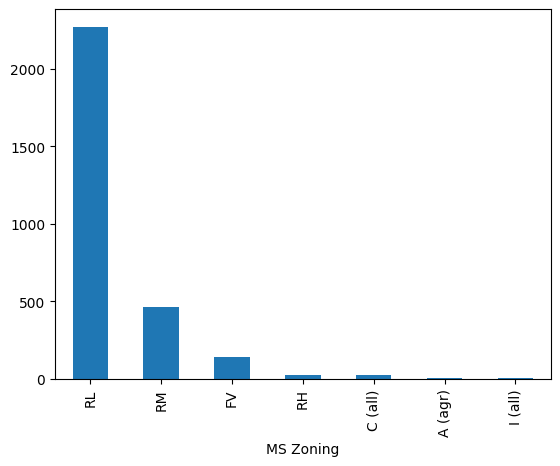

In [12]:
# categoricals
(housing
  ['MS Zoning']
  .value_counts()
  .plot.bar())

<Axes: ylabel='MS Zoning'>

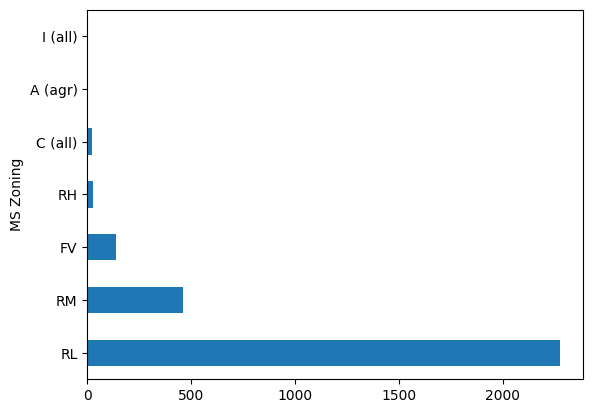

In [13]:
# categoricals
(housing
  ['MS Zoning']
  .value_counts()
  .plot.barh())

### 02_02: Histograms and Distributions

Goals:

* Obtain descriptive statistics of the "SalePrice" column using the `.describe` method.
* Visualize the distribution of the "SalePrice" column using a histogram.
* Customize the histogram by specifying the number of bins using the `bins` parameter.

In [14]:
# Numerical
(housing
 .SalePrice
 .describe()
)

count           2930.0
mean     180796.060068
std       79886.692357
min            12789.0
25%           129500.0
50%           160000.0
75%           213500.0
max           755000.0
Name: SalePrice, dtype: double[pyarrow]

<Axes: >

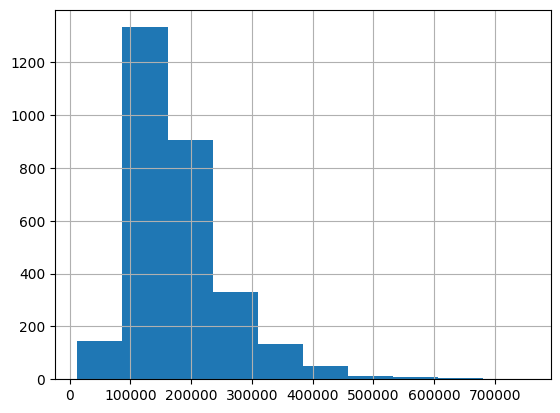

In [15]:
# Numerical
(housing
 .SalePrice
 .hist()
)

<Axes: >

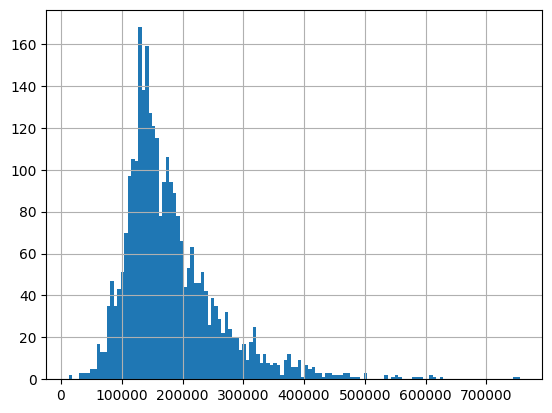

In [3]:
# Numerical
(housing
 .SalePrice
 .hist(bins=130)
)

### 02_03 - Outliers and Z-scores

Goals:

* Calculate the Z-score for the "SalePrice" column using the `calc_z` function.
* Identify outliers based on the Z-score by assigning a boolean column indicating whether the Z-score is greater than or equal to 3 or less than or equal to -3.
* Identify outliers using the IQR (interquartile range) method by assigning a boolean column indicating whether the values are outside the range of median ± 3 * IQR.


In [4]:
# outlier with Z-score
def calc_z(df, col):
    mean = df[col].mean() 
    std = df[col].std()
    return (df[col]-mean)/std

(housing
 .pipe(calc_z, col='SalePrice')
)

0       0.428156
1      -0.948795
2      -0.110107
3        0.79117
4       0.113961
          ...   
2925    -0.47938
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: double[pyarrow]

In [14]:
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))
 .query('z_score.abs() >= 3')
#  .query('z_score <= -3')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000,4.471382
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657,5.393401
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000,3.995709
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837,4.018704
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000,3.520035
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000,3.807943
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000,4.684184
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950,3.394232
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000,5.372659
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933,5.033841


In [27]:
# def calc_iqr_outlier(df, col):
#     ser = df[col]
#     iqr = ser.quantile(.75) - ser.quantile(.25)
#     med = ser.median()
#     small_mask = ser < med-iqr*3
#     large_mask = ser > med+iqr*3
#     return small_mask | large_mask

# housing[
# calc_iqr_outlier(housing, 'SalePrice')
# ]

In [15]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

(housing
 .assign(iqr_outlier=calc_iqr_outlier(housing, col='SalePrice'))
 .query('iqr_outlier')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,iqr_outlier
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000,True
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657,True
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000,True
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837,True
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000,True
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000,True
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000,True
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950,True
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000,True
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933,True


### 02_04 - Correlations

Goals:

* Calculate the Pearson correlation
* Calculate the Spearman correlation 
* Color a correlation matrix appropriately

In [26]:
# Pearson correlation
# housing.corr()

In [17]:
housing.corr(numeric_only=True)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [21]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient()
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [22]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu')
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [23]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

### 02_05 - Scatter Plots

Goals:

* Create a scatter plot
* Set transparency
* Jitter plot values

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

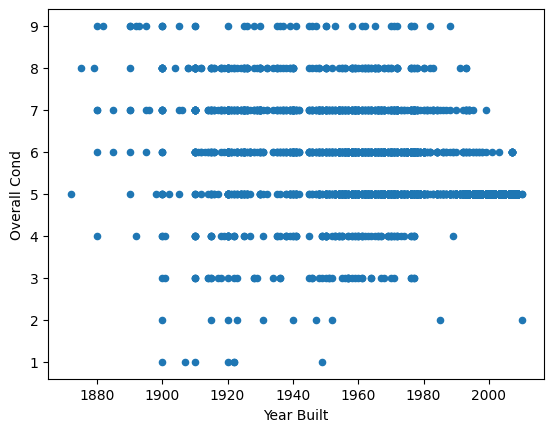

In [34]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond')
)

In [35]:
housing['Year Built'].corr(housing['Overall Cond'], method='spearman')

-0.42230619262743263

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

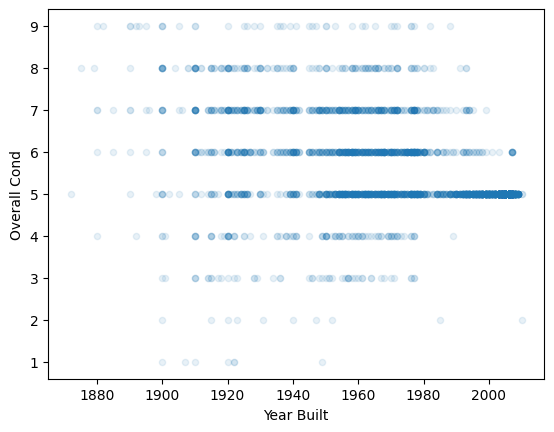

In [36]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

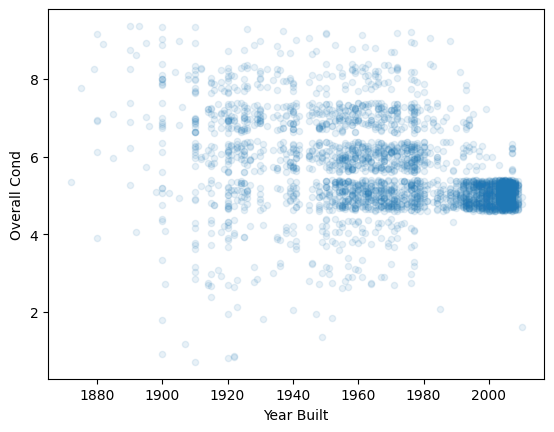

In [37]:
# with jitter in y
(housing
 .assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

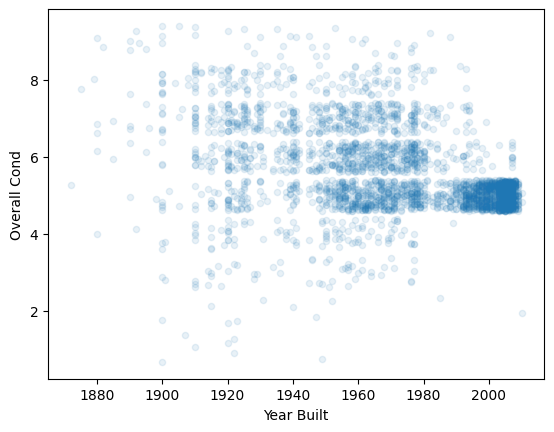

In [38]:
# make function
def jitter(df_, col, amount=.5):
    return (df_
            [col] + np.random.random(len(df_))*amount - (amount/2))
    
(housing
 .assign(#**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
     **{'Overall Cond': jitter(housing, 'Overall Cond', amount=.8)})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

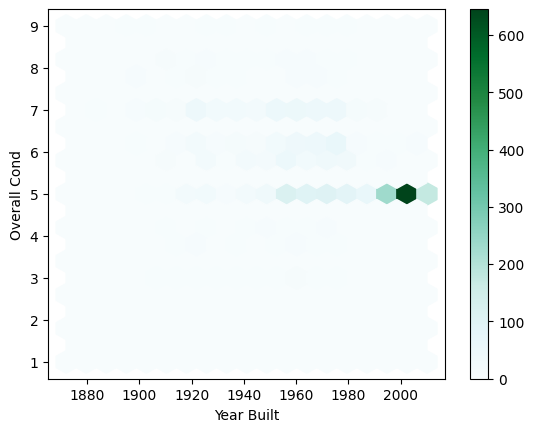

In [44]:

(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .hexbin(x='Year Built', y='Overall Cond', alpha=1, gridsize=18)
)

### 02_06 - Visualizing Categoricals and Numerical Values

Goals:

* Create a box plot of a single column
* Create a box plot of multiple columns
* Use the `.pivot` method
* Use Seaborn to create other distibution plots by category

<Axes: >

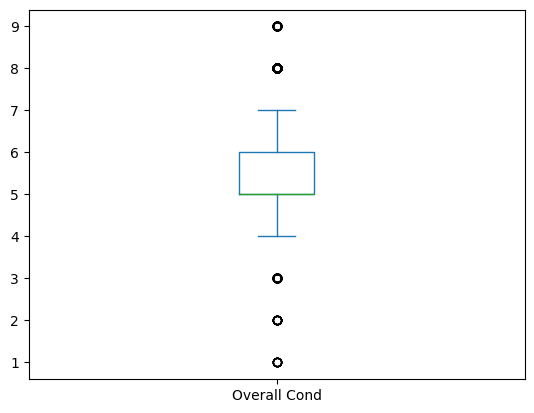

In [2]:
# Numerical and categorical
(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .box(x='Year Built', y='Overall Cond')
)

<Axes: >

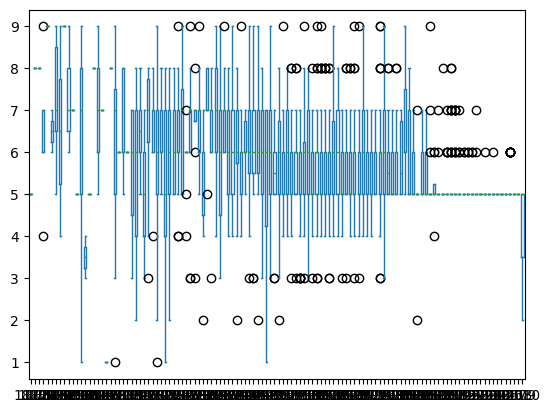

In [3]:
# Make multiple box plots
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .plot.box()
)

<Axes: >

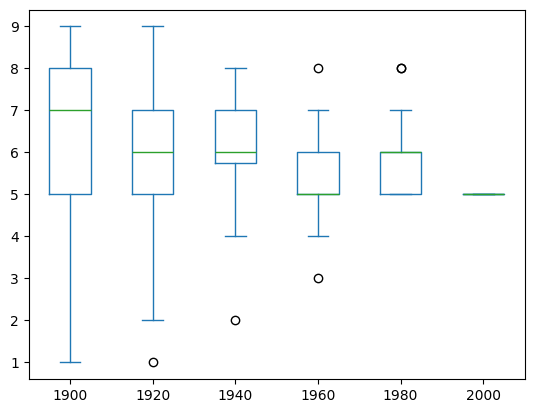

In [4]:
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .loc[:, [1900, 1920, 1940, 1960, 1980, 2000]]
 .plot.box()
)

In [ ]:
1993 // 10

<Axes: >

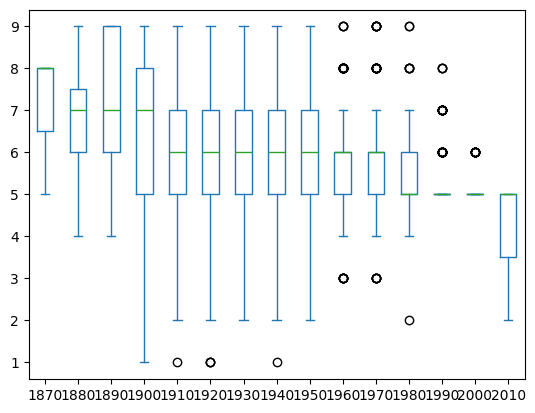

In [6]:
# Group by decade
(housing
 .assign(decade=(housing['Year Built']//10 ) * 10)
 .pivot(columns='decade', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .plot.box()
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

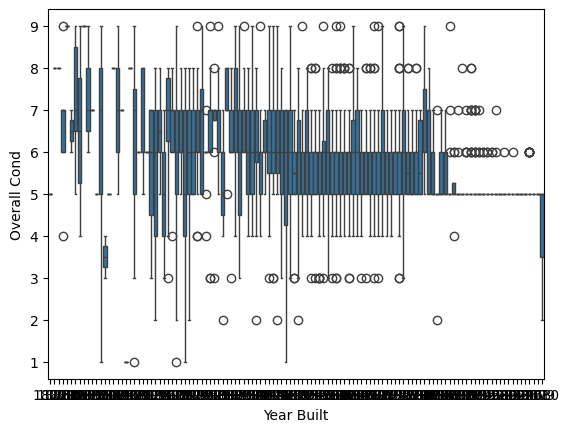

In [8]:
# or use seaborn
import seaborn as sns

sns.boxplot(data=housing, x='Year Built', y='Overall Cond')

In [9]:
sns.boxplot?

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

See the :ref:`tutorial <categorical_tutorial>` for more i

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

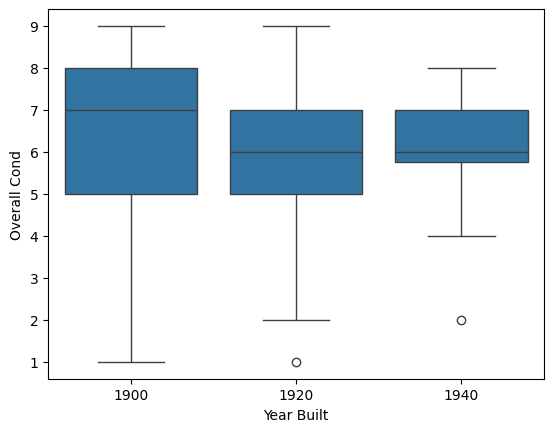

In [10]:
sns.boxplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

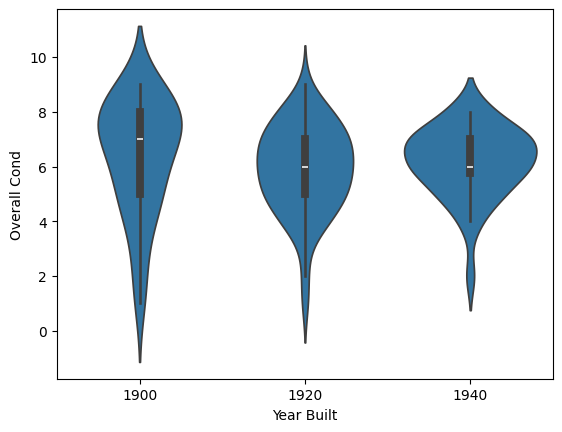

In [11]:
sns.violinplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

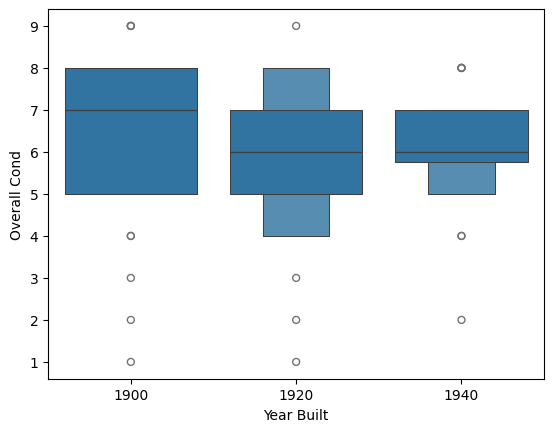

In [12]:
sns.boxenplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

### 02_07 - Comparing Two Categoricals

Goals:


* Create a cross-tabulation 
* Style the cross-tabulation table 
* Explore the documentation of the `.background_gradient` method of pandas styling.
* Create a stacked bar plot of a cross-tabulation

In [13]:
# 2 Categoricals
housing.dtypes[:40]


Order             uint16[pyarrow]
PID               uint32[pyarrow]
MS SubClass        uint8[pyarrow]
MS Zoning                category
Lot Frontage      uint16[pyarrow]
Lot Area          uint32[pyarrow]
Street                   category
Alley                    category
Lot Shape                category
Land Contour             category
Utilities                category
Lot Config               category
Land Slope               category
Neighborhood             category
Condition 1              category
Condition 2              category
Bldg Type                category
House Style              category
Overall Qual       uint8[pyarrow]
Overall Cond       uint8[pyarrow]
Year Built        uint16[pyarrow]
Year Remod/Add    uint16[pyarrow]
Roof Style               category
Roof Matl                category
Exterior 1st             category
Exterior 2nd             category
Mas Vnr Type             category
Mas Vnr Area      uint16[pyarrow]
Exter Qual               category
Exter Cond    

In [18]:
# 2 Categoricals - Cross tabulation
(housing
 .groupby(['Overall Qual', 'Bsmt Cond'])
 .size()
 .unstack()
)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_88844\52840291.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Overall Qual', 'Bsmt Cond'])


Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [19]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond']))

Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [20]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [21]:
raw.style.background_gradient?

Signature:
raw.style.background_gradient(
    cmap: 'str | Colormap' = 'PuBu',
    low: 'float' = 0,
    high: 'float' = 0,
    axis: 'Axis | None' = 0,
    subset: 'Subset | None' = None,
    text_color_threshold: 'float' = 0.408,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    gmap: 'Sequence | None' = None,
) -> 'Styler'
Docstring:
Color the background in a gradient style.

The background color is determined according
to the data in each column, row or frame, or by a given
gradient map. Requires matplotlib.

Parameters
----------
cmap : str or colormap
    Matplotlib colormap.
low : float
    Compress the color range at the low end. This is a multiple of the data
    range to extend below the minimum; good values usually in [0, 1],
    defaults to 0.
high : float
    Compress the color range at the high end. This is a multiple of the data
    range to extend above the maximum; good values usually in [0, 1],
    defaults to 0.
axis : {0, 1, "index", "columns", N

In [24]:
# Reorder
# Ex: Excellent
# Gd: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness
    
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po']]
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

Bsmt Cond,Ex,Gd,TA,Fa,Po
Overall Qual,,,,,
1,0,0,0,0,1
2,0,0,5,4,0
3,0,0,21,9,0
4,0,2,182,16,1
5,1,24,727,39,2
6,1,28,672,28,0
7,0,33,561,5,0
8,1,25,320,3,1
9,0,9,98,0,0


<Axes: xlabel='Overall Qual'>

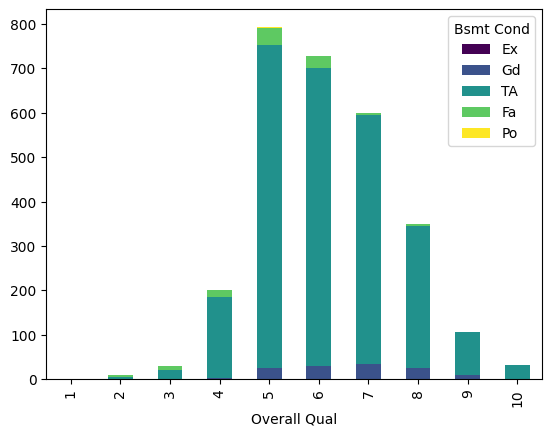

In [26]:
# Reorder
# Ex: Excellent
# Gd: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness
    
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po']]
 .plot.bar(stacked=True, 
           cmap='viridis')
)

### 02_08 - Challenge: Explore Ames
* Create a scatter plot of *1st Flr SF* against *SalePrice*

<Axes: xlabel='SalePrice', ylabel='1st Flr SF'>

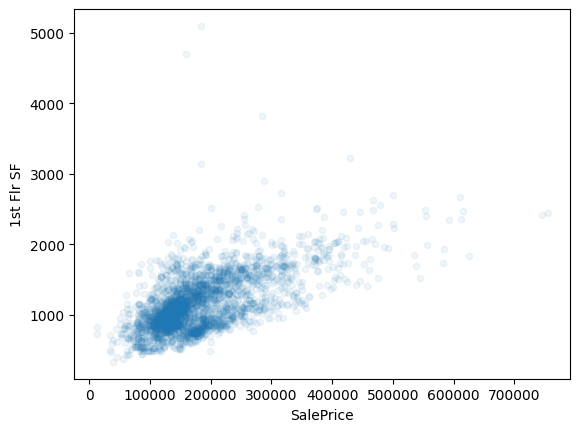

In [40]:
#02_09 - Solution
(housing
 .plot
 .scatter(x='SalePrice', y='1st Flr SF', alpha=0.07)
)

## Linear Regression


### 03_01 - Linear Regression

Goals:

* Understand how to prepare data for linear regression by selecting the relevant numerical features and the target variable.
* Learn to split the data into training and testing sets using `train_test_split` 
* Evaluate the performance of the linear regression model 

In [ ]:
from sklearn import linear_model, model_selection, preprocessing

X = housing.select_dtypes('number').drop(columns='SalePrice')
y = housing.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


In [ ]:
X_train.isna().any()

In [ ]:
import pandas as pd
url = 'data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing_no_na(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
     .pipe(lambda df_: df_.assign(**df_.select_dtypes('number').fillna(0)))
    )    
    

housing2 = clean_housing_no_na(raw)

In [ ]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

### 03_02 - Interpreting Linear Regression Models

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.feature_names_in_

In [ ]:
pd.Series(lr.coef_, index=lr.feature_names_in_)

In [ ]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .sort_values()
 .plot.barh())

In [ ]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .pipe(lambda ser: ser[ser.abs() > 100])
 .sort_values()
 .plot.barh())

In [ ]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .pipe(lambda ser: ser[ser.abs() > 100])
 .sort_values()
 .index
)


### 03_03 - Standardizing Values

Goals:

* Understand the concept of standardization 
* Learn to use the `StandardScaler` class 
* Evaluate the impact of standardization on the performance of the linear regression model using the coefficient of determination (R-squared) score.
* Visualize the coefficients of the linear regression model using a horizontal bar plot.

In [ ]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

std = preprocessing.StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


In [ ]:
# was .84
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .plot.barh())

In [ ]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
# .plot.barh()
)

In [ ]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > 1e8])
 .plot.barh()
)

In [ ]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > 1e8])
 .index
)

In [ ]:
simple_feats = set(['Kitchen AbvGr', 'Yr Sold', 'Bedroom AbvGr', 'Half Bath',
       'Bsmt Half Bath', 'MS SubClass', 'Full Bath', 'Year Remod/Add',
       'Mo Sold', 'Year Built', 'TotRms AbvGrd', 'Fireplaces', 'Overall Cond',
       'Bsmt Full Bath', 'Garage Cars', 'Overall Qual'])
std_feats = set(['Total Bsmt SF', '2nd Flr SF', '1st Flr SF', 'Low Qual Fin SF',
       'BsmtFin SF 2', 'Gr Liv Area', 'Bsmt Unf SF', 'BsmtFin SF 1'])
print(sorted(simple_feats | std_feats))

In [ ]:
# Look at correlations 
(X
 .assign(SalePrice=y)
 .corr()
 .loc[['SalePrice', '1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 
       'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Fireplaces', 'Full Bath', 
       'Garage Cars', 'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Low Qual Fin SF',
       'MS SubClass', 'Mo Sold', 'Overall Cond', 'Overall Qual', 'TotRms AbvGrd', 
       'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']]
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
 .set_sticky(axis='index') 
)

### 03_04 - Regression with XGBoost

Goals:

* Learn to use the XGBoost library (`xgboost`) for regression tasks.
* Evaluate the performance of the XGBoost model.
* Explore the importance of features in the XGBoost model using the feature importances.

In [ ]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

std = preprocessing.StandardScaler().set_output(transform='pandas')
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


In [ ]:
import xgboost as xgb
# was .84
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

In [ ]:
pd.Series(xg.feature_importances_, index=X_train.columns).sort_values().plot.barh(figsize=(3,12))

In [ ]:
# Use categories
# (Need to convert pyarrow numbers to pandas 1.x numbers)
X_cat = (housing.assign(**housing.select_dtypes('number').astype('Int64')).drop(columns='SalePrice'))

y_cat = housing.SalePrice
X_cat_train, X_cat_test, y_cat_train, y_cat_test = model_selection.train_test_split(X_cat, y_cat, random_state=42)
xg_cat = xgb.XGBRegressor(enable_categorical=True, tree_method='hist')
xg_cat.fit(X_cat_train, y_cat_train)
xg_cat.score(X_cat_test, y_cat_test)

In [ ]:
pd.Series(xg_cat.feature_importances_, index=xg_cat.feature_names_in_).sort_values().plot.barh(figsize=(3,12))

### 03_05 - Challenge: Predict Ames
* Create a linear regression model using the top 5 features from the (non-categorical) XGBoost model
* What is the `.score` of the model?

In [ ]:
# 03_06


## Hypothesis Test

### 04_01 - Exploring Data

Goals:

* Explore summary statistics by group


In [ ]:
from scipy import stats
housing.Neighborhood.value_counts()

In [ ]:
(housing
 .groupby('Neighborhood')
 .describe())

In [ ]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['CollgCr', 'NAmes'], ['SalePrice']]
)

In [ ]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['CollgCr', 'NAmes'], ['SalePrice']]
 .T
)

### 04_02 - Visualizing Distributions

Goals

* Make histograms of both distributions
* Make a cumulative distribution plot

In [ ]:
n_ames = (housing
          .query('Neighborhood == "NAmes"')
          .SalePrice)
college_cr = (housing
          .query('Neighborhood == "CollgCr"')
          .SalePrice)

In [ ]:
ax = n_ames.hist(label='NAmes')
college_cr.hist(ax=ax, label='CollgCr')
ax.legend()

In [ ]:
alpha = .7
ax = n_ames.hist(label='NAmes', alpha=alpha)
college_cr.hist(ax=ax, label='CollgCr', alpha=alpha)
ax.legend()

In [ ]:
(n_ames
 .to_frame()
 .assign(cdf=n_ames.rank(method='average', pct=True))
 .sort_values(by='SalePrice')
 .plot(x='SalePrice', y='cdf', label='NAmes')
)

In [ ]:
def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
plot_cdf(n_ames, label='NAmes')

In [ ]:
def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
    
fig, ax = plt.subplots(figsize=(8,4))
plot_cdf(n_ames, label='NAmes', ax=ax)
plot_cdf(college_cr, label='CollegeCr', ax=ax)

### 04_03 - Running Statistical Tests

Goals:

* Use the `scipy.stats` module to run a statistical test

In [ ]:
print(dir(stats))

In [ ]:
stats.ks_2samp?

In [ ]:
ks_statistic, p_value = stats.ks_2samp(n_ames, college_cr)
print(ks_statistic, p_value)

In [ ]:
if p_value > 0.05:
    print('Fail to reject null hypothesis: Same distribution')
else:
    print('Reject null hypothesis: Not from the same distribution')


### 04_04 - Testing for Normality

Goals:

* Use the `scipy.stats` module to test for normality
* Use the `scipy.stats` module to create a probability plot

In [ ]:
# Use the Shapiro-Wilks test
shapiro_stat, p_value = stats.shapiro(n_ames)

In [ ]:
if p_value > 0.05:
    print("The distribution of the series is likely normal (fail to reject H0)")
else:
    print("The distribution of the series is likely not normal (reject H0)")


In [ ]:
p_value

In [ ]:
stats.probplot?

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
_ = stats.probplot(n_ames, plot=ax)

In [ ]:
alpha = .7
ax = n_ames.hist(label='NAmes', alpha=alpha)
college_cr.hist(ax=ax, label='CollgCr', alpha=alpha)
ax.legend()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
_ = stats.probplot(college_cr, plot=ax)

### 04_05 - Challenge: Checking Square Footage Distributions
* Is the distribution of *1st Flr SF* from *NAmes* and *CollgCr* the same?

In [ ]:
# 04_06
